# **Task 3 solution**

In [183]:
FILE_PATH = "task3-ep-places.csv"

RS = 42 # random state

In [184]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from pycaret.regression import setup, compare_models, create_model

import optuna

#### **Data loading**

In [185]:
data = pd.read_csv(FILE_PATH)
data.head()

,meat.weight,milk.pcs,water.pcs,flour.pcs,ep.places.no
0,545.707153,1872,960,720,7.95
1,756.805321,1296,1002,530,7.95
2,1154.249659,576,990,560,7.97
3,1818.251424,396,840,1990,12.60
4,419.330223,540,756,1780,7.28


In [186]:
target = "ep.places.no"
features = data.columns.values.tolist()
features.remove(target)

#### **Visualization relationships between dependent and independent variables**

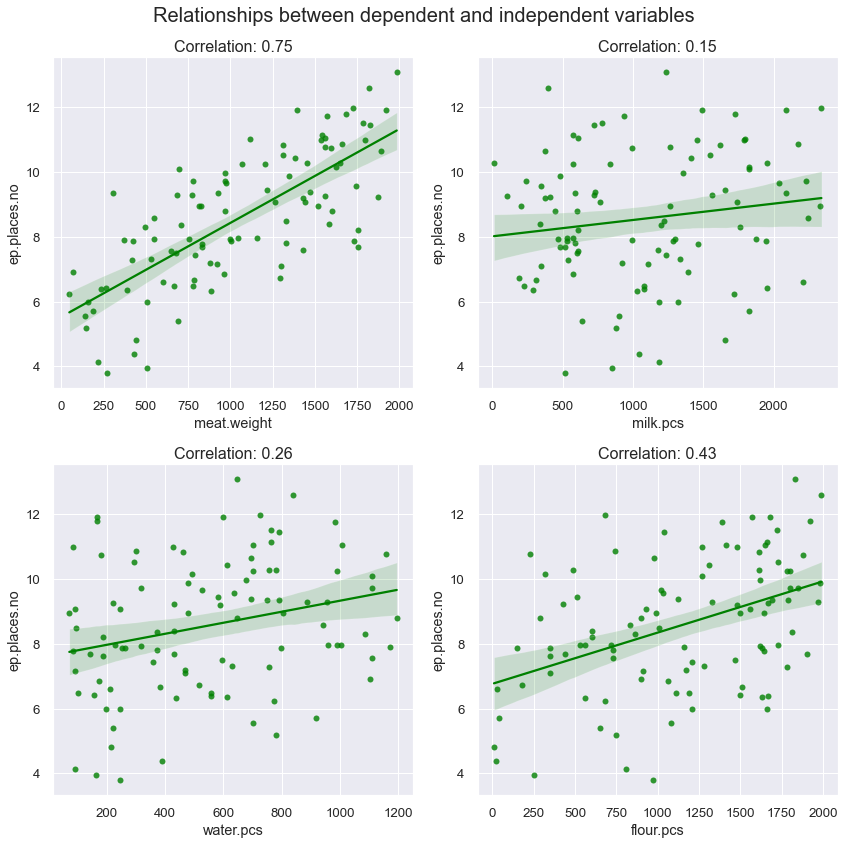

In [187]:
corr = data.corr().loc[features, target]

sns.set(font_scale=1.2)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for ax, feature in zip(axs.flatten(), features):
    sns.regplot(ax=ax, data=data, x=feature, y=target, color="green")
    ax.set_title(f"Correlation: {corr[feature]:.2f}", fontsize=16)

fig.suptitle("Relationships between dependent and independent variables", fontsize=20)

plt.tight_layout()

#### **Splitting data into train test sets**

In [188]:
X_train, X_test, y_train, y_test = train_test_split(
    data[features],
    data[target],
    test_size=0.3,
    random_state=RS
)

#### **Scaling**

In [189]:
X_train_index = X_train.index
X_test_index = X_test.index
columns = X_train.columns

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test_index, columns=columns)

#### **Model selection**

In [190]:
_ = setup(
    data=pd.concat([X_train, y_train], axis=1), 
    target=target, 
    fold=5,
    session_id=RS,
    silent=True,
    verbose=False
)

In [191]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2242,0.0787,0.2769,0.9771,0.0290,0.0265,0.0040
lr,Linear Regression,0.2243,0.0789,0.2772,0.9770,0.0291,0.0265,0.7060
lar,Least Angle Regression,0.2243,0.0789,0.2772,0.9770,0.0291,0.0265,0.0040
ridge,Ridge Regression,0.2349,0.0816,0.2819,0.9764,0.0300,0.0279,0.3080
huber,Huber Regressor,0.2117,0.0797,0.2752,0.9764,0.0290,0.0254,0.0040
par,Passive Aggressive Regressor,0.3669,0.2446,0.4591,0.9353,0.0504,0.0435,0.0040
et,Extra Trees Regressor,0.7635,0.8507,0.9129,0.7705,0.0992,0.0928,0.0340
gbr,Gradient Boosting Regressor,0.8039,1.0374,1.0090,0.7310,0.1078,0.0977,0.0080
knn,K Neighbors Regressor,0.8453,1.0133,1.0047,0.7276,0.1087,0.1038,0.0060
ada,AdaBoost Regressor,0.8538,1.0618,1.0161,0.7249,0.1094,0.1035,0.0140


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

#### **Base model (ElasticNet)**

In [192]:
en_reg_base = create_model("en")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5397,2.8456,1.6869,0.4293,0.1912,0.1993
1,1.0173,1.4242,1.1934,0.4192,0.1348,0.1355
2,1.2409,2.1061,1.4513,0.3838,0.1465,0.1426
3,1.3937,2.3163,1.5220,0.5026,0.1614,0.1686
4,1.0867,1.7970,1.3405,0.5340,0.1403,0.1310
Mean,1.2557,2.0978,1.4388,0.4538,0.1548,0.1554
Std,0.1925,0.4798,0.1664,0.0557,0.0202,0.0255


#### **Tuning**

In [193]:
# def objective(trial, X, y, cv, scoring):
#     en_params = {
#         "alpha": trial.suggest_float("alpha", 1e-5, 100),
#         "l1_ratio": trial.suggest_float("l1_ratio", 0, 1) 
#     }

#     en_reg = ElasticNet(**en_params, random_state=RS)
#     scores = cross_validate(en_reg,  X, y, cv=cv, scoring=scoring)

#     rmse = scores["test_score"].mean()

#     return rmse

In [194]:
# kf = KFold(n_splits=5, shuffle=True, random_state=RS)
# func = lambda trial: objective(
#     trial, 
#     X_train, 
#     y_train, 
#     cv=kf, 
#     scoring="neg_root_mean_squared_error"
# )

# study = optuna.create_study(direction="maximize")
# study.optimize(func, n_trials=100)

In [195]:
# print(f"Optimized RMSE: {-study.best_value:.4f}")

In [196]:
# study.best_params

#### **Final model (ElasticNet)**

In [197]:
params = {'alpha': 0.00417, 'l1_ratio': 0.09526}
en_reg = ElasticNet(**params, random_state=RS)
en_reg.fit(X_train, y_train)

ElasticNet(alpha=0.00417, copy_X=True, fit_intercept=True, l1_ratio=0.09526,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

#### **Evaluation (using RMSE)**

In [198]:
y_pred = en_reg.predict(X_test)

rmse_score = mean_squared_error(y_test, y_pred, squared=False)

print(f"\u001b[34;1mRMSE score: {rmse_score:.4f}")

RMSE score: 0.2393
